# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

In [2]:
# Import the OpenWeatherMap API key
from api_keys import weather_api_key


In [3]:
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_desc = city_weather["weather"][0]["description"]

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Current Description": city_weather_desc
                         })

# If an error is experienced, skip the city.
    except:
        print("City '" + city.title() + "' not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | qulsary
Processing Record 5 of Set 1 | laguna
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | sokol
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | fergus falls
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | howrah
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | ironwood
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | barcelos
Processing Record 19 of Set 1 | guapo
Processing Record 20 of Set 1 | uturoa
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | saipan
Processing Rec

Processing Record 41 of Set 4 | port alfred
Processing Record 42 of Set 4 | remire-montjoly
Processing Record 43 of Set 4 | lingcheng
Processing Record 44 of Set 4 | wagar
Processing Record 45 of Set 4 | kuyucak
Processing Record 46 of Set 4 | inhambane
Processing Record 47 of Set 4 | isabela
Processing Record 48 of Set 4 | gurupi
Processing Record 49 of Set 4 | horta
Processing Record 50 of Set 4 | walvis bay
Processing Record 1 of Set 5 | patterson
Processing Record 2 of Set 5 | mweka
Processing Record 3 of Set 5 | kharan
Processing Record 4 of Set 5 | kapuskasing
Processing Record 5 of Set 5 | parauna
Processing Record 6 of Set 5 | nadi
Processing Record 7 of Set 5 | levuka
Processing Record 8 of Set 5 | at taj
Processing Record 9 of Set 5 | kodiak
Processing Record 10 of Set 5 | hamilton
Processing Record 11 of Set 5 | vangaindrano
Processing Record 12 of Set 5 | enewetak
Processing Record 13 of Set 5 | kandahar
Processing Record 14 of Set 5 | carbonear
Processing Record 15 of Set 

Processing Record 32 of Set 8 | lagoa
Processing Record 33 of Set 8 | lakatoro
Processing Record 34 of Set 8 | tobelo
Processing Record 35 of Set 8 | guachochi
City 'Guachochi' not found. Skipping...
Processing Record 36 of Set 8 | lorengau
Processing Record 37 of Set 8 | ingeniero jacobacci
Processing Record 38 of Set 8 | roma
Processing Record 39 of Set 8 | borogontsy
Processing Record 40 of Set 8 | yarmouth
Processing Record 41 of Set 8 | namibe
Processing Record 42 of Set 8 | shasta lake
Processing Record 43 of Set 8 | zaozersk
Processing Record 44 of Set 8 | colonia
Processing Record 45 of Set 8 | ahwa
Processing Record 46 of Set 8 | byarozawka
Processing Record 47 of Set 8 | nova vicosa
Processing Record 48 of Set 8 | dano
Processing Record 49 of Set 8 | kuusamo
Processing Record 50 of Set 8 | sogod
Processing Record 1 of Set 9 | salalah
Processing Record 2 of Set 9 | ust-nera
Processing Record 3 of Set 9 | tevriz
Processing Record 4 of Set 9 | al kawa
Processing Record 5 of Set 

Processing Record 18 of Set 12 | puerto gaitan
Processing Record 19 of Set 12 | nyurba
Processing Record 20 of Set 12 | buala
Processing Record 21 of Set 12 | fort mcmurray
Processing Record 22 of Set 12 | sasovo
Processing Record 23 of Set 12 | new plymouth
Processing Record 24 of Set 12 | sassandra
Processing Record 25 of Set 12 | yanchep
Processing Record 26 of Set 12 | bangassou
Processing Record 27 of Set 12 | akureyri
Processing Record 28 of Set 12 | namdrik
Processing Record 29 of Set 12 | kamalpur
Processing Record 30 of Set 12 | fuling
Processing Record 31 of Set 12 | richards bay
Processing Record 32 of Set 12 | rebrikha
Processing Record 33 of Set 12 | severo-yeniseyskiy
Processing Record 34 of Set 12 | zag
Processing Record 35 of Set 12 | banda aceh
Processing Record 36 of Set 12 | duyun
Processing Record 37 of Set 12 | phillip island
Processing Record 38 of Set 12 | malvan
Processing Record 39 of Set 12 | mount gambier
Processing Record 40 of Set 12 | kunming
Processing Re

In [6]:
# Show Re# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City                   593
Lat                    593
Lng                    593
Max Temp               593
Humidity               593
Cloudiness             593
Wind Speed             593
Country                593
Current Description    593
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description
0,Constantia,44.1833,28.6500,56.08,68,0,9.04,RO,clear sky
1,Port-Aux-Francais,-49.3500,70.2167,41.04,93,87,27.04,TF,overcast clouds
2,Jamestown,42.0970,-79.2353,46.04,74,0,1.99,US,clear sky
3,Qulsary,46.9531,54.0198,76.12,38,0,16.64,KZ,clear sky
4,Laguna,38.4210,-121.4238,57.76,76,0,6.91,US,clear sky


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description
City_ID,,,,,,,,,
0,Port-Aux-Francais,-49.3500,70.2167,38.98,67,70,36.01,TF,broken clouds
1,Sabang,5.8933,95.3214,82.36,80,99,17.69,ID,overcast clouds
2,Blackmans Bay,-43.0167,147.3167,42.53,78,27,6.80,AU,scattered clouds
3,Saudarkrokur,65.7461,-19.6394,46.31,81,100,3.67,IS,overcast clouds
4,Manali,13.1667,80.2667,91.49,78,100,11.23,IN,overcast clouds


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

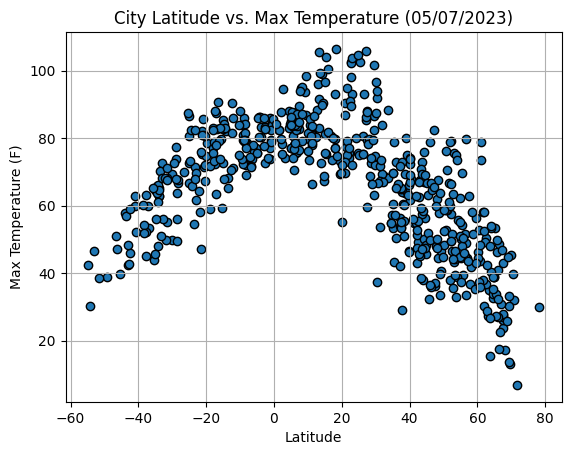

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (05/07/2023)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

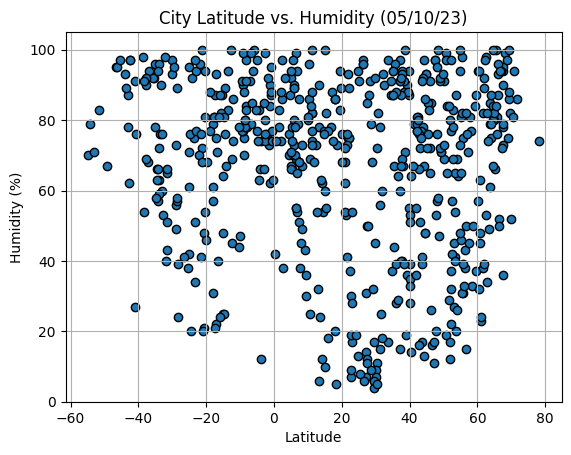

In [11]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Set the title and axis labels
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the y-axis limit and grid
plt.ylim(0, 105)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()

#### Latitude Vs. Cloudiness

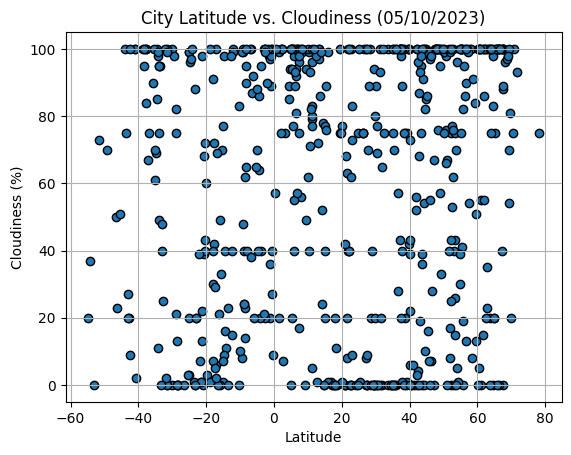

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Set x and y axis labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().strftime('%m/%d/%Y')})")

# Set grid line
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

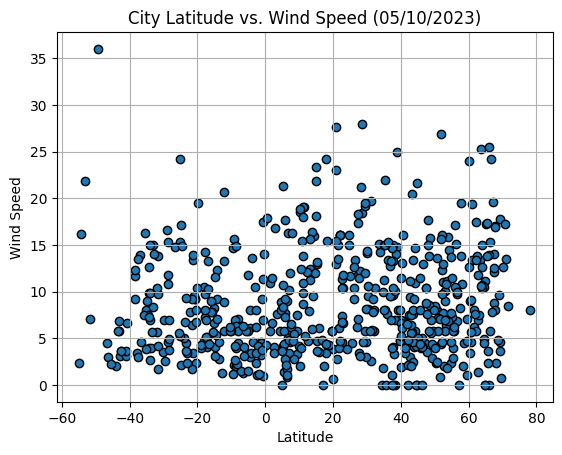

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black")

# Set x and y axis labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().strftime('%m/%d/%Y')})")

# Set grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, coordinates):
    
    # linear regression on x and y values
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # create regression line
    regression_values = x_values * slope + intercept
    line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    # create scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_values, "r-")
    
    # add equation for the line
    plt.annotate(line_equation, coordinates, fontsize =15, color="red")
    
    # set x and y axis labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # print r-squared value
    print(f"The r-squared is: {r_value**2}")
    
    # show plot
    plt.show()
    

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description
City_ID,,,,,,,,,
1,Sabang,5.8933,95.3214,82.36,80,99,17.69,ID,overcast clouds
3,Saudarkrokur,65.7461,-19.6394,46.31,81,100,3.67,IS,overcast clouds
4,Manali,13.1667,80.2667,91.49,78,100,11.23,IN,overcast clouds
6,Hawaiian Paradise Park,19.5933,-154.9731,69.31,94,75,5.75,US,light rain
7,Igarka,67.4667,86.5833,26.20,73,100,8.79,RU,overcast clouds


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description
City_ID,,,,,,,,,
0,Port-Aux-Francais,-49.3500,70.2167,38.98,67,70,36.01,TF,broken clouds
2,Blackmans Bay,-43.0167,147.3167,42.53,78,27,6.80,AU,scattered clouds
5,Waitangi,-43.9535,-176.5597,57.81,93,100,1.99,NZ,overcast clouds
9,Puerto Ayora,-0.7393,-90.3518,79.56,95,89,7.00,EC,light rain
10,Grytviken,-54.2811,-36.5092,30.36,79,37,16.17,GS,light snow


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6466825367313078


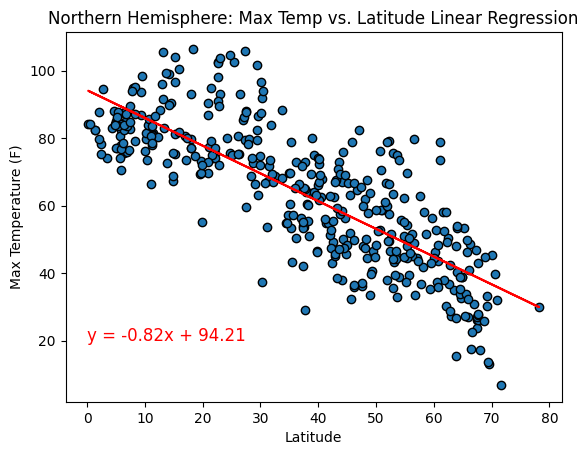

In [17]:
# Northern Hemisphere
# Create a scatter plot of latitude versus temperature for Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors="black")

# Perform linear regression on latitude versus temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Create a plot with the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate the plot with the line equation
plt.annotate(line_eq, (10,-20), fontsize=15, color="red")

# Set x and y axis labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere: Max Temp vs. Latitude Linear Regression")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add the equation to the scatter plot
plt.annotate(line_eq,(0,20),fontsize=12,color="red")


# Show plot
plt.show()


The r-squared is: 0.6252643061554619


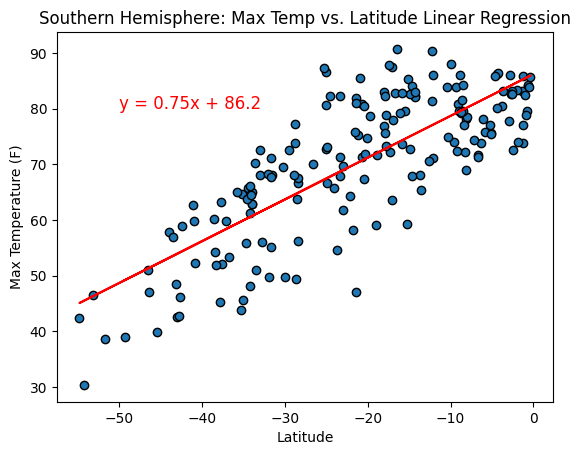

In [18]:
# Southern Hemisphere
# Create a scatter plot of latitude versus temperature for Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors="black")

# Perform linear regression on latitude versus temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Create a plot with the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate the plot with the line equation
plt.annotate(line_eq, (10,-20), fontsize=15, color="red")

# Set x and y axis labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere: Max Temp vs. Latitude Linear Regression")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add the equation to the scatter plot
plt.annotate(line_eq,(-50,80),fontsize=12,color="red")


# Show plot
plt.show()


Discussion about the linear relationship: 
- Northern Hemisphere Max Temp vs. Latitude there is a negative linear regression. R-squared is .6467, suggesting a moderate correlation between Max Temp and Latitude. When looking at the graph, we can conclude that as the latitude above 0 increases, the max temperture decreases. 

- Southern Hemisphere Max Temp vs. Latitude there is a positive linear regression. R-squared is .6253, suggesting a moderate correlation between Max Temp and Latitude. When looking at the graph, we can conclude that as the latitude below 0 increases, the max temperture increases.  

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0031407907624010686


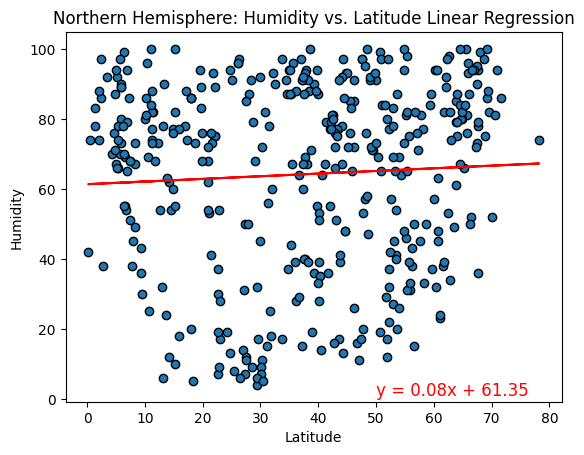

In [19]:
# Northern Hemisphere
# Create a scatter plot of latitude versus Humidity for Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors="black")

# Perform linear regression on latitude versus Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Create a plot with the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate the plot with the line equation
plt.annotate(line_eq, (10,-20), fontsize=15, color="red")

# Set x and y axis labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere: Humidity vs. Latitude Linear Regression")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add the equation to the scatter plot
plt.annotate(line_eq,(50,1),fontsize=12,color="red")


# Show plot
plt.show()


The r-squared is: 0.0004149927028623572


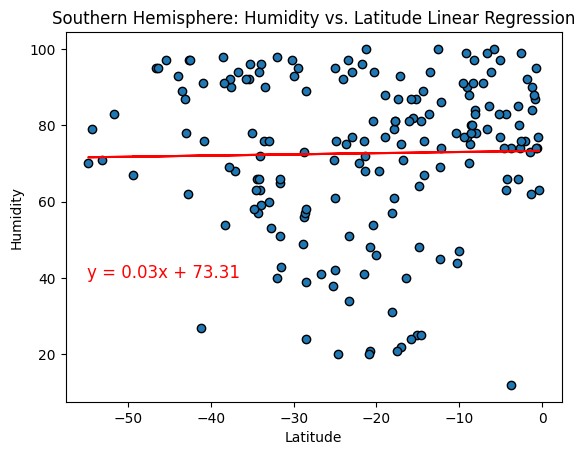

In [20]:
# Southern Hemisphere
# Create a scatter plot of latitude versus Humidity for Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors="black")

# Perform linear regression on latitude versus Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Create a plot with the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate the plot with the line equation
plt.annotate(line_eq, (10,-20), fontsize=15, color="red")

# Set x and y axis labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere: Humidity vs. Latitude Linear Regression")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add the equation to the scatter plot
plt.annotate(line_eq,(-55,40),fontsize=12,color="red")


# Show plot
plt.show()


Discussion about the linear relationship:
- Northern Hemisphere Humidity vs. Latitude there is a slightly postive linear regression. R-squared is .0031, suggesting a weak correlation between Humidity and Latitude. We can conclude that there is little relationship between Humidity vs. Latitude in the Northern Hemisphere.

- Southern Hemisphere Humidity vs. Latitude there is a relatively flat linear regression. R-squared is .0004, suggesting a weak correlation between Humidity and Latitude. We can conclude that there is little relationship between Humidity vs. Latitude in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0015046927072468227


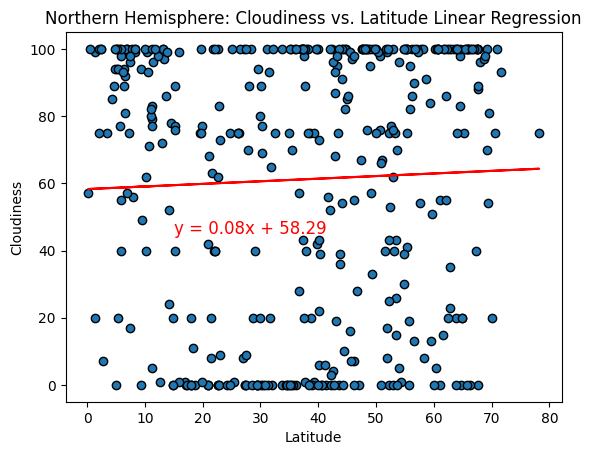

In [21]:
# Northern Hemisphere
# Create a scatter plot of latitude versus Cloudiness for Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors="black")

# Perform linear regression on latitude versus Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Create a plot with the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate the plot with the line equation
plt.annotate(line_eq, (10,-20), fontsize=15, color="red")

# Set x and y axis labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude Linear Regression")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add the equation to the scatter plot
plt.annotate(line_eq,(15,45),fontsize=12,color="red")


# Show plot
plt.show()

The r-squared is: 0.0012608733021189555


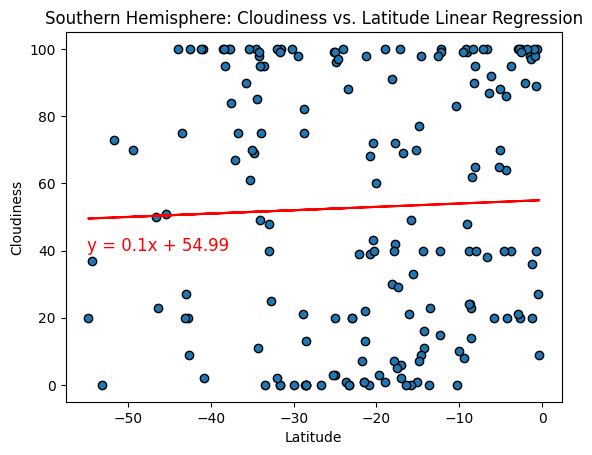

In [22]:
# Southern Hemisphere
# Create a scatter plot of latitude versus Cloudiness for Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors="black")

# Perform linear regression on latitude versus Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Create a plot with the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Set x and y axis labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude Linear Regression")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add the equation to the scatter plot
plt.annotate(line_eq,(-55,40),fontsize=12,color="red")


# Show plot
plt.show()

Discussion about the linear relationship:
- Northern Hemisphere Cloudiness vs. Latitude there is a relatively flat linear regression. R-squared is .0015, suggesting a weak correlation between Cloudiness and Latitude. We can conclude that there is little relationship between Cloudiness vs. Latitude in the Northern Hemisphere.

- Southern Hemisphere Cloudiness vs. Latitude there is a slightly positive linear regression. With a r-squared of .0013, suggesting a weak correlation between Cloudiness and Latitude. We can conclude that there is little relationship between Cloudiness vs. Latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00039803781973896953


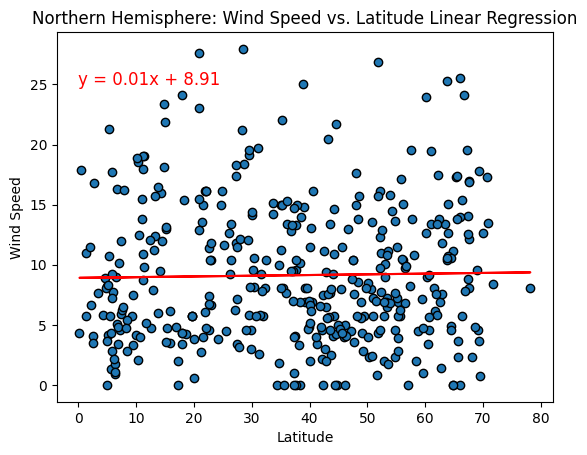

In [23]:
# Northern Hemisphere
# Create a scatter plot of latitude versus Wind Speed for Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors="black")

# Perform linear regression on latitude versus Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Create a plot with the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Set x and y axis labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude Linear Regression")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add the equation to the scatter plot
plt.annotate(line_eq,(0,25),fontsize=12,color="red")


# Show plot
plt.show()

The r-squared is: 0.03328867915043273


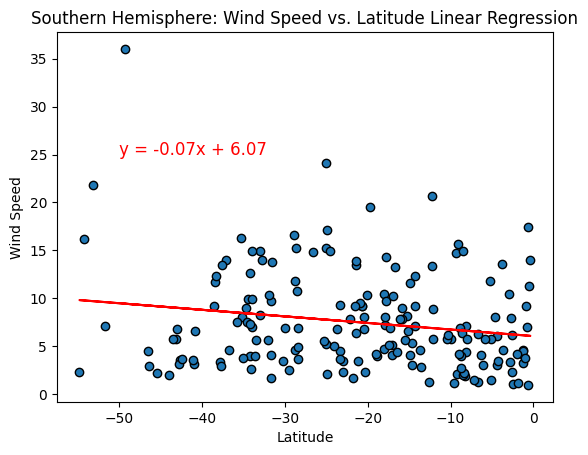

In [26]:
# Southern Hemisphere
# Create a scatter plot of latitude versus Wind Speed for Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors="black")

# Perform linear regression on latitude versus Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Create a plot with the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Set x and y axis labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude Linear Regression")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add the equation to the scatter plot
plt.annotate(line_eq,(-50,25),fontsize=12,color="red")


# Show plot
plt.show()

Discussion about the linear relationship:
- Northern Hemisphere Wind Speed vs. Latitude there is a relatively flat linear regression. R-squared is .0004, suggesting a weak correlation between Wind Speed and Latitude. We can conclude that there is little relationship between Wind Speed vs. Latitude in the Northern Hemisphere.

- Southern Hemisphere Wind Speed vs. Latitude there is a slight negative linear regression. R-squared is .0332, suggesting a weak correlation between Wind Speed and Latitude. We can conclude that there is little relationship between Wind Speed vs. Latitude in the Southern Hemisphere.